In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Open the test image

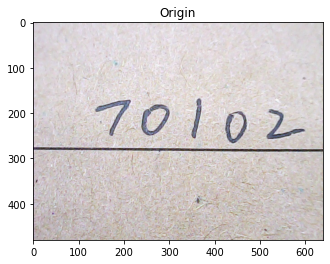

In [2]:
# path = "/Users/tony/Desktop/data/cc1.jpg"
path = "./captured/cap_1.jpg"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Origin")
plt.show()

Trace the image pre-processing

In [3]:
from pre_process import *

In [4]:
length = 5

[(189, 191), (235, 252)]


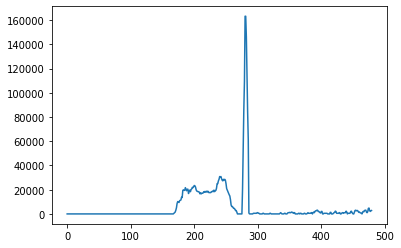

In [5]:
binary = access_binary(image)
hori_vals = np.sum(binary, axis=1)
plt.plot(hori_vals)
hori_points = extract_peek(hori_vals, min_vals=20000, min_rect=70)
print(hori_points)

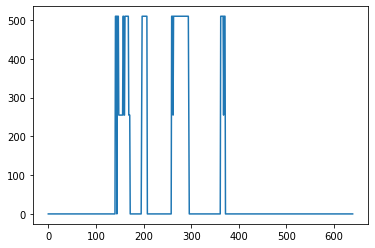

In [6]:
hori_point = hori_points[0]

extract_img = binary[hori_point[0]:hori_point[1], :]
vec_vals = np.sum(extract_img, axis=0)
plt.plot(vec_vals)

Data shape (5, 28, 28, 1)


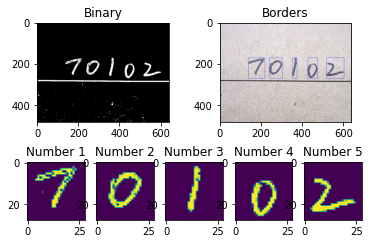

In [7]:
binary, with_borders, data = trace_image(image, length=5, min_size = 100)

plt.subplot(2, 2, 1)
plt.imshow(binary, cmap="gray")
plt.title("Binary")

plt.subplot(2, 2, 2)
plt.imshow(with_borders)
plt.title("Borders")

for i in range(data.shape[0]):
    plt.subplot(2, length, length + i + 1)
    plt.imshow(data[i]), plt.title("Number {}".format(i + 1))
print("Data shape", data.shape)

In [8]:
from cnn import Recognizer
recognizer = Recognizer()


TensorFLow version 2.3.0
Keras version 2.4.0
Numpy version 1.18.5
Loading model model.h5
Model loaded


In [9]:
data = data.astype('float32') / 255
results = recognizer.model.predict(data)
print(results)

[[4.1378868e-07 1.6701970e-03 3.5799998e-03 1.0879955e-04 1.6602715e-05
  1.2635841e-06 7.7019939e-07 9.9451607e-01 6.4897417e-06 9.9268997e-05]
 [9.9963582e-01 2.6089688e-09 1.6018363e-07 1.2940144e-08 2.3123587e-08
  8.9575359e-08 8.3415063e-07 6.6790584e-08 1.8845578e-05 3.4420218e-04]
 [4.8042441e-09 9.9996436e-01 1.2843309e-06 1.4875626e-08 3.6724741e-06
  2.5158340e-07 1.8333078e-07 2.3754405e-05 3.0423456e-07 6.3000252e-06]
 [9.9999976e-01 1.1665106e-10 5.6029098e-10 8.1805651e-10 4.5734527e-09
  1.7838824e-08 7.8085336e-08 9.3907753e-09 7.3974292e-08 2.3953262e-08]
 [1.1903204e-06 1.1229799e-09 9.9999881e-01 5.4487660e-12 2.3360758e-09
  4.2681878e-12 6.2502739e-11 4.0568132e-10 1.3752374e-09 1.3456577e-12]]


In [10]:
numbers = []
for res in results:
    numbers.append(str(np.argmax(res)))
result = int(''.join(numbers))
print("Result", result)

Result 70102
